# Loading and Using Local Datasets for Unsupervised Learning

## 🎯 Overall Problem Statement
**Real-world Challenge**: You have three different business datasets with no predefined labels or categories. Each dataset presents unique analytical challenges:

1. **Customer Data**: Need to segment customers for targeted marketing
2. **Marketing Campaigns**: Want to identify high-performing campaign patterns
3. **Product Sales**: Need to understand product relationships and reduce complexity

## 📋 Demo Objectives
Learn how to:
- **Load and preprocess** real CSV datasets
- **Choose appropriate algorithms** for different business problems
- **Extract actionable insights** from unsupervised learning results
- **Validate and interpret** clustering and dimensionality reduction outcomes

This notebook demonstrates how to load and analyze the CSV datasets in your directory with proper problem framing and algorithm justification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.style.use('seaborn-v0_8')
np.random.seed(42)

## Dataset 1: Customer Data Analysis

### 🎯 Problem Statement
**Business Challenge**: You're a CRM manager with 50 customers and need to create personalized marketing strategies. Current issues:
- **Generic campaigns** have low conversion rates (2-3%)
- **Customer lifetime value** varies dramatically but you don't know why
- **Churn prediction** is difficult without understanding customer types
- **Marketing budget** is wasted on irrelevant messages to wrong customers

### 🤔 Why K-Means for Customer Segmentation?
**K-means is optimal here because**:
- **Clear business segments**: Each cluster = distinct customer persona
- **Balanced features**: Spending, frequency, order value, and recency are all important
- **Actionable results**: Marketing team can create specific campaigns per segment
- **Interpretable centroids**: Cluster centers show "typical" customer in each segment

**Expected segments**:
- High-value frequent buyers (VIP treatment)
- Budget-conscious regular customers (discount offers)
- Infrequent high-spenders (premium product focus)
- At-risk customers (retention campaigns)

In [2]:
# Load customer data
customers = pd.read_csv('customer_data.csv')
print("📊 Customer Dataset:")
print(customers.head())
print(f"\nShape: {customers.shape}")
print("\nSummary Statistics:")
print(customers.describe())

📊 Customer Dataset:
   customer_id  annual_spending  visit_frequency  avg_order_value  \
0            1          4523.45               15           142.30   
1            2          7890.12                8           245.67   
2            3          2341.78               22            89.45   
3            4          6754.23               12           198.76   
4            5          3456.89               18           156.34   

   days_since_last_purchase  
0                        12  
1                        45  
2                         3  
3                        18  
4                         7  

Shape: (50, 5)

Summary Statistics:
       customer_id  annual_spending  visit_frequency  avg_order_value  \
count     50.00000        50.000000        50.000000        50.000000   
mean      25.50000      5136.631000        15.840000       198.211200   
std       14.57738      2354.224966         7.864568        97.804595   
min        1.00000      1543.210000         3.000000    

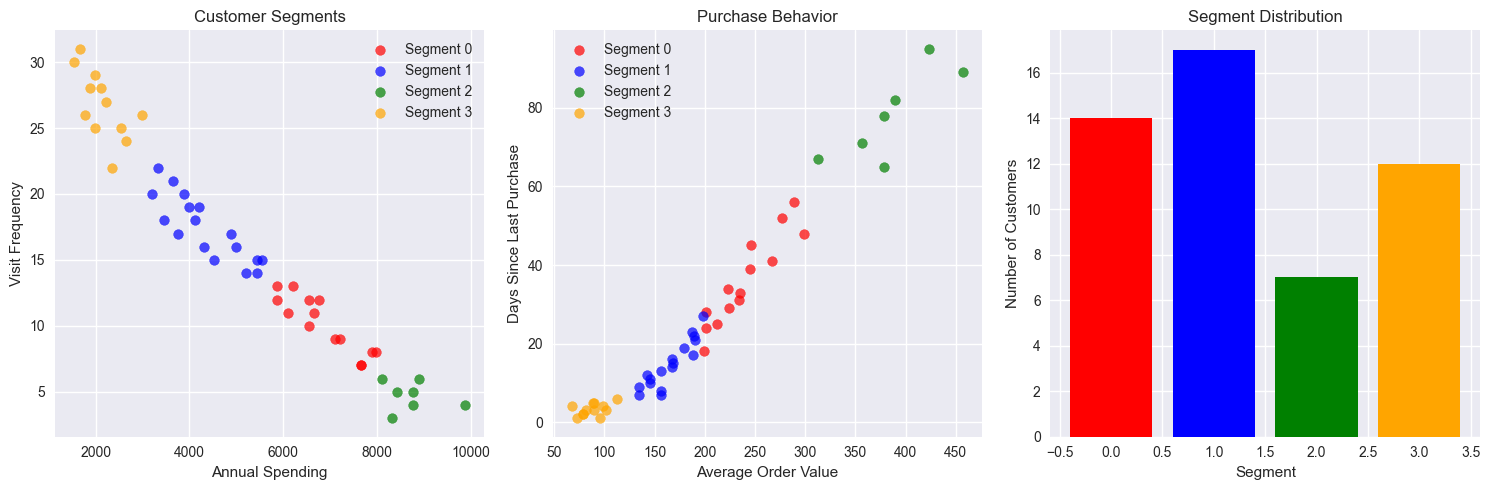


🎯 Segment Analysis:
         annual_spending  visit_frequency  avg_order_value  \
segment                                                      
0                6862.58            10.14           239.47   
1                4348.29            17.41           165.11   
2                8738.84             4.71           385.20   
3                2138.55            26.75            87.89   

         days_since_last_purchase  
segment                            
0                           35.93  
1                           14.76  
2                           78.14  
3                            3.25  


In [3]:
# Customer segmentation using K-means
features = ['annual_spending', 'visit_frequency', 'avg_order_value', 'days_since_last_purchase']
X_customers = customers[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_customers)

# Apply K-means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customers['segment'] = kmeans.fit_predict(X_scaled)

# Visualize segments
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
colors = ['red', 'blue', 'green', 'orange']
for i in range(4):
    mask = customers['segment'] == i
    plt.scatter(customers[mask]['annual_spending'], customers[mask]['visit_frequency'], 
               c=colors[i], alpha=0.7, label=f'Segment {i}')
plt.xlabel('Annual Spending')
plt.ylabel('Visit Frequency')
plt.title('Customer Segments')
plt.legend()

plt.subplot(1, 3, 2)
for i in range(4):
    mask = customers['segment'] == i
    plt.scatter(customers[mask]['avg_order_value'], customers[mask]['days_since_last_purchase'], 
               c=colors[i], alpha=0.7, label=f'Segment {i}')
plt.xlabel('Average Order Value')
plt.ylabel('Days Since Last Purchase')
plt.title('Purchase Behavior')
plt.legend()

plt.subplot(1, 3, 3)
segment_counts = customers['segment'].value_counts().sort_index()
plt.bar(range(4), segment_counts, color=colors)
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.title('Segment Distribution')

plt.tight_layout()
plt.show()

print("\n🎯 Segment Analysis:")
print(customers.groupby('segment')[features].mean().round(2))

## Dataset 2: Marketing Campaign Analysis

### 🎯 Problem Statement
**Marketing Challenge**: You've run 30 different campaigns with varying performance. Key problems:
- **Inconsistent results**: Some campaigns perform 10x better than others
- **Budget allocation**: Don't know which campaign types to invest in
- **Audience targeting**: Unclear which demographics respond to which messages
- **Performance patterns**: Can't identify what makes campaigns successful

### 🤔 Why K-Means for Campaign Analysis?
**K-means reveals campaign patterns because**:
- **Performance clustering**: Groups campaigns by similar success metrics
- **Multi-dimensional analysis**: Considers engagement, conversion, and spending together
- **Resource optimization**: Identifies which campaign types deserve more budget
- **Replicable insights**: Shows characteristics of high-performing campaigns

**Expected campaign types**:
- High-engagement, high-conversion (premium campaigns)
- Low-engagement, low-conversion (failed campaigns to avoid)
- High-engagement, low-conversion (awareness campaigns)

### 📊 Business Impact
- **ROI improvement**: Focus budget on proven campaign patterns
- **Risk reduction**: Avoid campaign types that consistently underperform
- **Scaling success**: Replicate characteristics of top-performing clusters

📈 Marketing Dataset:
   campaign_id  email_opens  click_rate  conversion_rate  spend_amount  \
0            1           45        0.12             0.03       1250.50   
1            2           78        0.18             0.07       2340.75   
2            3           23        0.08             0.01        450.25   
3            4           67        0.15             0.05       1890.30   
4            5           34        0.10             0.02        780.60   

  age_group income_level  
0     25-34       medium  
1     35-44         high  
2     18-24          low  
3     45-54         high  
4     25-34       medium  

Shape: (30, 7)


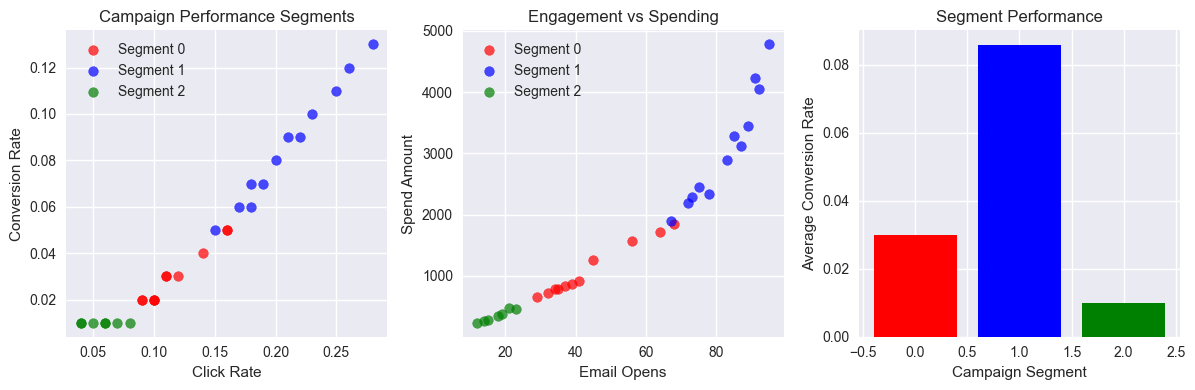


📊 Campaign Segment Analysis:
                  email_opens  click_rate  conversion_rate  spend_amount
campaign_segment                                                        
0                      43.636       0.116            0.030      1084.145
1                      82.250       0.210            0.086      3079.821
2                      17.429       0.057            0.010       344.536


In [4]:
# Load marketing data
marketing = pd.read_csv('marketing_data.csv')
print("📈 Marketing Dataset:")
print(marketing.head())
print(f"\nShape: {marketing.shape}")

# Encode categorical variables
marketing_encoded = marketing.copy()
marketing_encoded['age_group_encoded'] = pd.Categorical(marketing['age_group']).codes
marketing_encoded['income_level_encoded'] = pd.Categorical(marketing['income_level']).codes

# Select numerical features for clustering
features_marketing = ['email_opens', 'click_rate', 'conversion_rate', 'spend_amount', 
                     'age_group_encoded', 'income_level_encoded']
X_marketing = marketing_encoded[features_marketing]

# Standardize and cluster
scaler_marketing = StandardScaler()
X_marketing_scaled = scaler_marketing.fit_transform(X_marketing)

kmeans_marketing = KMeans(n_clusters=3, random_state=42, n_init=10)
marketing['campaign_segment'] = kmeans_marketing.fit_predict(X_marketing_scaled)

# Visualize
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
colors = ['red', 'blue', 'green']
for i in range(3):
    mask = marketing['campaign_segment'] == i
    plt.scatter(marketing[mask]['click_rate'], marketing[mask]['conversion_rate'], 
               c=colors[i], alpha=0.7, label=f'Segment {i}')
plt.xlabel('Click Rate')
plt.ylabel('Conversion Rate')
plt.title('Campaign Performance Segments')
plt.legend()

plt.subplot(1, 3, 2)
for i in range(3):
    mask = marketing['campaign_segment'] == i
    plt.scatter(marketing[mask]['email_opens'], marketing[mask]['spend_amount'], 
               c=colors[i], alpha=0.7, label=f'Segment {i}')
plt.xlabel('Email Opens')
plt.ylabel('Spend Amount')
plt.title('Engagement vs Spending')
plt.legend()

plt.subplot(1, 3, 3)
segment_performance = marketing.groupby('campaign_segment')['conversion_rate'].mean()
plt.bar(range(3), segment_performance, color=colors)
plt.xlabel('Campaign Segment')
plt.ylabel('Average Conversion Rate')
plt.title('Segment Performance')

plt.tight_layout()
plt.show()

print("\n📊 Campaign Segment Analysis:")
print(marketing.groupby('campaign_segment')[['email_opens', 'click_rate', 'conversion_rate', 'spend_amount']].mean().round(3))

## Dataset 3: Product Sales Analysis with PCA

### 🎯 Problem Statement
**Product Management Challenge**: You have 25 products with 6 different metrics each. Current issues:
- **Complex relationships**: Can't visualize how price, sales, ratings, and categories interact
- **Product positioning**: Don't understand which products are similar/different
- **Inventory decisions**: Need to identify product groups for bundling/promotion
- **Data overload**: Too many dimensions to analyze manually

### 🤔 Why PCA + K-Means for Product Analysis?
**This combination is powerful because**:

**PCA first**:
- **Dimensionality reduction**: 6 features → 2-3 components for visualization
- **Correlation handling**: Combines related metrics (price/revenue correlation)
- **Noise reduction**: Focuses on the most important product characteristics
- **Visualization**: Makes product relationships visible on 2D plots

**Then K-Means**:
- **Product grouping**: Creates clusters of similar products
- **Strategic insights**: Each cluster represents a product category/strategy
- **Business decisions**: Enables targeted pricing, promotion, and inventory strategies

### 📊 Expected Product Groups
- **Premium products**: High price, high rating, low volume
- **Mass market**: Medium price, high volume, good ratings
- **Budget options**: Low price, high volume, variable ratings

### 💡 Why Not Just K-Means Alone?
- **Curse of dimensionality**: K-means struggles with 6+ features
- **Visualization impossible**: Can't plot 6D data to understand results
- **Correlated features**: Price and revenue are related, causing redundancy
- **Interpretation difficulty**: Hard to explain which features drive each cluster

🛍️ Product Sales Dataset:
   product_id         product_name   price  units_sold   revenue     category  \
0           1  Wireless Headphones   89.99         245  22047.55  Electronics   
1           2         Coffee Maker  129.99         189  24568.11   Appliances   
2           3        Running Shoes   79.99         312  24956.88       Sports   
3           4      Smartphone Case   19.99         567  11334.33  Electronics   
4           5             Yoga Mat   34.99         198   6928.02       Sports   

   rating  reviews_count  
0     4.2            156  
1     4.5            203  
2     4.1            287  
3     3.8            445  
4     4.6            134  

Shape: (25, 8)


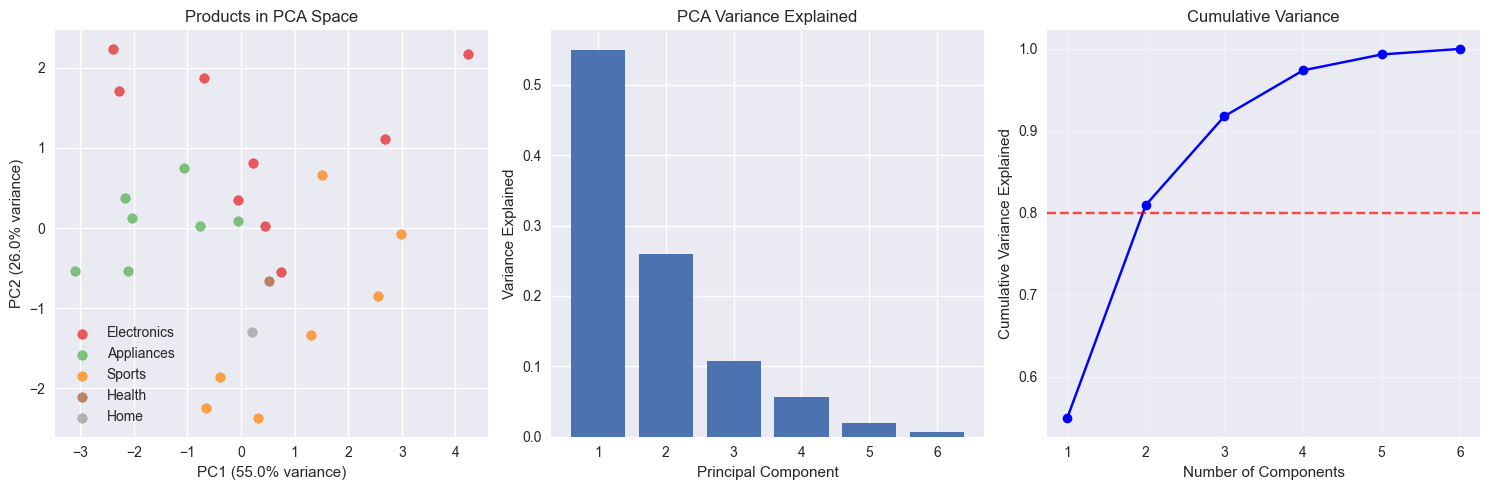


🔍 PCA Results:
• First 2 components explain 81.0% of variance
• First 3 components explain 91.8% of variance

📦 Product Cluster Analysis:
                  price  units_sold   revenue  rating
product_cluster                                      
0                 71.24      210.17  14083.73    4.33
1                207.49      133.50  26982.42    4.47
2                 34.99      413.80  13248.26    3.98


In [5]:
# Load product data
products = pd.read_csv('product_sales.csv')
print("🛍️ Product Sales Dataset:")
print(products.head())
print(f"\nShape: {products.shape}")

# Encode category
products['category_encoded'] = pd.Categorical(products['category']).codes

# Select numerical features
features_products = ['price', 'units_sold', 'revenue', 'rating', 'reviews_count', 'category_encoded']
X_products = products[features_products]

# Standardize data
scaler_products = StandardScaler()
X_products_scaled = scaler_products.fit_transform(X_products)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_products_scaled)

# Visualize PCA results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
categories = products['category'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(categories)))
for i, category in enumerate(categories):
    mask = products['category'] == category
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=[colors[i]], alpha=0.7, label=category)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Products in PCA Space')
plt.legend()

plt.subplot(1, 3, 2)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Variance Explained')

plt.subplot(1, 3, 3)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumsum) + 1), cumsum, 'bo-')
plt.axhline(y=0.8, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🔍 PCA Results:")
print(f"• First 2 components explain {cumsum[1]:.1%} of variance")
print(f"• First 3 components explain {cumsum[2]:.1%} of variance")

# Cluster products using first 3 PCA components
kmeans_products = KMeans(n_clusters=3, random_state=42, n_init=10)
products['product_cluster'] = kmeans_products.fit_predict(X_pca[:, :3])

print("\n📦 Product Cluster Analysis:")
print(products.groupby('product_cluster')[['price', 'units_sold', 'revenue', 'rating']].mean().round(2))

## Summary: Working with Your Own Datasets

### 📁 Available Datasets:
- **customer_data.csv**: Customer behavior and spending patterns
- **marketing_data.csv**: Campaign performance metrics
- **product_sales.csv**: Product sales and ratings data

### 🧠 Algorithm Selection Framework

**When to use K-Means**:
- ✅ Need clear, interpretable groups (customer segments, campaign types)
- ✅ Features are roughly similar in importance
- ✅ Want actionable business segments
- ✅ Data has natural cluster structure

**When to use PCA first**:
- ✅ Many features (>4) make visualization impossible
- ✅ Features are correlated (price/revenue, ratings/reviews)
- ✅ Need to reduce noise and focus on main patterns
- ✅ Want to understand feature importance

**When to combine PCA + K-Means**:
- ✅ High-dimensional data that needs grouping
- ✅ Want both dimensionality reduction AND clustering
- ✅ Need to visualize cluster results
- ✅ Features have different scales and correlations

### 🔧 Key Steps for Any Dataset:
1. **Define the problem**: What business question are you answering?
2. **Load data**: `pd.read_csv('filename.csv')`
3. **Explore**: Check shape, summary statistics, missing values
4. **Choose algorithm**: Based on problem type and data characteristics
5. **Preprocess**: Handle categorical variables, standardize features
6. **Apply algorithms**: K-means for clustering, PCA for dimensionality reduction
7. **Visualize results**: Scatter plots, bar charts, variance plots
8. **Interpret**: Extract business insights from clusters/components
9. **Validate**: Do results make business sense?

### 💡 Pro Tips:
- **Always standardize** features before clustering (different scales affect results)
- **Use elbow method** to choose optimal number of clusters
- **PCA helps visualize** high-dimensional data patterns
- **Domain knowledge is crucial** for interpreting results
- **Start simple** - try 2-3 clusters first, then increase if needed
- **Validate results** - do the clusters make business sense?